# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [157]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from PIL import Image

# for working with image data
import glob
from skimage import io

import keras
from keras.preprocessing.text import Tokenizer 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf

from keras.preprocessing import image
from nltk.translate.bleu_score import sentence_bleu
import os

import warnings
warnings.filterwarnings("ignore")


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [158]:
#Import the dataset and read the image into a seperate variable

images= 'Flickr8K/Images'  # path of the folder where images are present
text_file = 'Flickr8K/captions.txt'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [159]:
dummy = pd.read_csv(text_file)
dummy

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [160]:
images+'/' + dummy.image

0        Flickr8K/Images/1000268201_693b08cb0e.jpg
1        Flickr8K/Images/1000268201_693b08cb0e.jpg
2        Flickr8K/Images/1000268201_693b08cb0e.jpg
3        Flickr8K/Images/1000268201_693b08cb0e.jpg
4        Flickr8K/Images/1000268201_693b08cb0e.jpg
                           ...                    
40450     Flickr8K/Images/997722733_0cb5439472.jpg
40451     Flickr8K/Images/997722733_0cb5439472.jpg
40452     Flickr8K/Images/997722733_0cb5439472.jpg
40453     Flickr8K/Images/997722733_0cb5439472.jpg
40454     Flickr8K/Images/997722733_0cb5439472.jpg
Name: image, Length: 40455, dtype: object

In [161]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    #your code here
    text_file = open(filename,'rb')
    text = text_file.read().decode('utf-8')
    text_file.close()
    
    text = text.split('\n')
    
    return text

doc = load_doc(text_file)
print(doc[:300])

['image,caption', '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .', '1000268201_693b08cb0e.jpg,A girl going into a wooden building .', '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .', '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .', '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .', '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting', '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .', '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .', '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .', '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .', '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hand

In [162]:
len(doc)

40457

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [163]:
all_img_id,all_img_vector,annotations = [],[],[]
for i in range(1,len(doc)-1):
    #print(images+'/'+doc[i].split(',')[0])
    #print(doc[i].split(',')[1])
    #print(doc[i].split(',')[0].split('_')[0])
    
    all_img_id.append(doc[i].split(',')[0].split('_')[0]) #store all the image id here
    all_img_vector.append(images+'/'+doc[i].split(',')[0]) #store all the image path here
    annotations.append(doc[i].split(',')[1]) #store all the captions here
    #print(all_img_id)

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df
#annotations

,ID,Path,Captions
0,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [164]:
annotations[5000:5004]

['A black and gray cat stands on a contracption while two big dogs stare at it .',
 'Two black and white dogs are looking at a grey and white kitty .',
 'Two black and white dogs look at a kitten perched on some equipment .',
 'Two black and white dogs looking at a black and white kitten who is sitting on top of a tank with hoses on it .']

200    Two constructions workers sit on a beam taking...
201    Two construction workers are sitting up on the...
202      Two construction workers sitting on an I-beam .
203    Two construction workers take a seat on a stee...
204             Two men take a break from construction .
Name: Captions, dtype: object


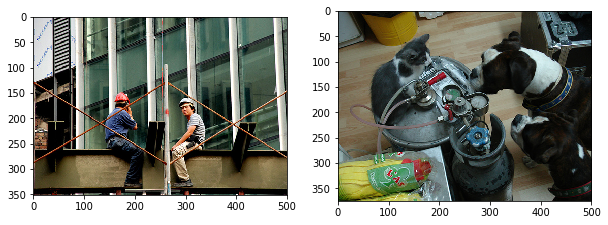

5000    A black and gray cat stands on a contracption ...
5001    Two black and white dogs are looking at a grey...
5002    Two black and white dogs look at a kitten perc...
5003    Two black and white dogs looking at a black an...
5004       Two dogs are staring at a grey and white cat .
Name: Captions, dtype: object


In [165]:
#Visualise both the images & text present in the dataset
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(io.imread(df.Path[201]))
print(df.Captions.loc[200:204])

plt.subplot(1,2,2)
plt.imshow(io.imread(df.Path[5001]))
plt.show()

# displaying the text present in the dataset
print(df.Captions.loc[5000:5004])

In [166]:
def words(document):
    "Convert text to lower case and tokenise the document"
    return re.findall(r'\w+', document.lower())

In [167]:
df.Captions.values

array(['A child in a pink dress is climbing up a set of stairs in an entry way .',
       'A girl going into a wooden building .',
       'A little girl climbing into a wooden playhouse .', ...,
       'A person in a red shirt climbing up a rock face covered in assist handles .',
       'A rock climber in a red shirt .',
       'A rock climber practices on a rock climbing wall .'], dtype=object)

In [168]:
all_words = words(' '.join(annotations))
all_words

['a',
 'child',
 'in',
 'a',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'a',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 'a',
 'girl',
 'going',
 'into',
 'a',
 'wooden',
 'building',
 'a',
 'little',
 'girl',
 'climbing',
 'into',
 'a',
 'wooden',
 'playhouse',
 'a',
 'little',
 'girl',
 'climbing',
 'the',
 'stairs',
 'to',
 'her',
 'playhouse',
 'a',
 'little',
 'girl',
 'in',
 'a',
 'pink',
 'dress',
 'going',
 'into',
 'a',
 'wooden',
 'cabin',
 'a',
 'black',
 'dog',
 'and',
 'a',
 'spotted',
 'dog',
 'are',
 'fighting',
 'a',
 'black',
 'dog',
 'and',
 'a',
 'tri',
 'colored',
 'dog',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'the',
 'road',
 'a',
 'black',
 'dog',
 'and',
 'a',
 'white',
 'dog',
 'with',
 'brown',
 'spots',
 'are',
 'staring',
 'at',
 'each',
 'other',
 'in',
 'the',
 'street',
 'two',
 'dogs',
 'of',
 'different',
 'breeds',
 'looking',
 'at',
 'each',
 'other',
 'on',
 'the',
 'road',
 'two',
 'dogs',
 'on',
 'pavement',
 'moving',
 '

In [169]:
#Create the vocabulary & the counter for the captions

vocabulary= all_words #write your code here

val_count=Counter(vocabulary)
val_count

Counter({'a': 61436,
         'child': 1517,
         'in': 18193,
         'pink': 706,
         'dress': 332,
         'is': 9069,
         'climbing': 495,
         'up': 1251,
         'set': 106,
         'of': 6504,
         'stairs': 109,
         'an': 2358,
         'entry': 1,
         'way': 51,
         'girl': 3284,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1750,
         'playhouse': 6,
         'the': 17677,
         'to': 3008,
         'her': 1102,
         'cabin': 4,
         'black': 3641,
         'dog': 7958,
         'and': 8066,
         'spotted': 37,
         'are': 3365,
         'fighting': 131,
         'tri': 12,
         'colored': 204,
         'playing': 1954,
         'with': 7308,
         'each': 399,
         'other': 667,
         'on': 10369,
         'road': 389,
         'white': 3728,
         'brown': 2484,
         'spots': 28,
         'staring': 57,
         'at': 2820

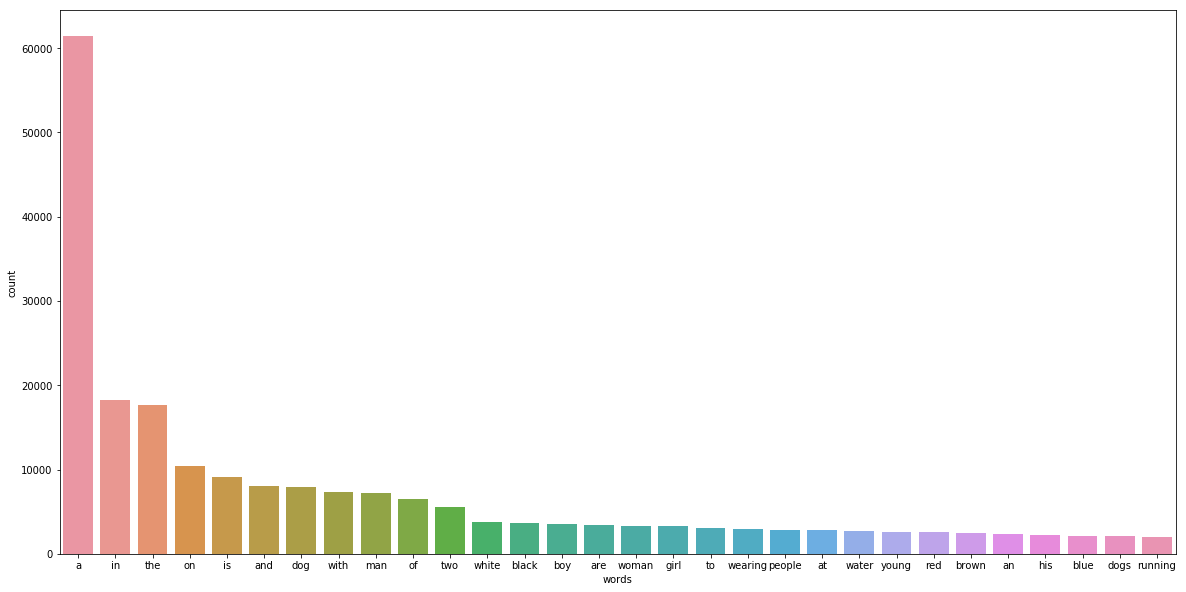

In [170]:
#Visualise the top 30 occuring words in the captions

#write your code here
top_30 = pd.DataFrame(val_count.most_common(30),columns=['words','count'])
plt.figure(figsize=(20,10))
sns.barplot(x=top_30['words'],y=top_30['count'])

In [171]:
# replacing . (dot)
temp = df.Captions.str.replace(".","")
df.Captions = temp.str.lower()
df.Captions.values


array(['a child in a pink dress is climbing up a set of stairs in an entry way ',
       'a girl going into a wooden building ',
       'a little girl climbing into a wooden playhouse ', ...,
       'a person in a red shirt climbing up a rock face covered in assist handles ',
       'a rock climber in a red shirt ',
       'a rock climber practices on a rock climbing wall '], dtype=object)

In [172]:
list(df.Captions.apply(lambda x: f"<start> {x}<end>").values)

['<start> a child in a pink dress is climbing up a set of stairs in an entry way <end>',
 '<start> a girl going into a wooden building <end>',
 '<start> a little girl climbing into a wooden playhouse <end>',
 '<start> a little girl climbing the stairs to her playhouse <end>',
 '<start> a little girl in a pink dress going into a wooden cabin <end>',
 '<start> a black dog and a spotted dog are fighting<end>',
 '<start> a black dog and a tri-colored dog playing with each other on the road <end>',
 '<start> a black dog and a white dog with brown spots are staring at each other in the street <end>',
 '<start> two dogs of different breeds looking at each other on the road <end>',
 '<start> two dogs on pavement moving toward each other <end>',
 '<start> a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl <end>',
 '<start> a little girl is sitting in front of a large painted rainbow <end>',
 '<start> a small girl in the grass plays with fingerpaints in fr

In [173]:
#Create a list which contains all the captions
annotations= annotations #write your code here

#add the <start> & <end> token to all those captions as well
df.Captions = df.Captions.apply(lambda x: f'<start> {x} <end>')

#Create a list which contains all the path to the images
all_img_path= set(all_img_vector) #write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [174]:
df

,ID,Path,Captions
0,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,<start> a child in a pink dress is climbing up...
1,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,<start> a girl going into a wooden building <...
2,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,<start> a little girl climbing into a wooden p...
3,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,<start> a little girl climbing the stairs to h...
4,1000268201,Flickr8K/Images/1000268201_693b08cb0e.jpg,<start> a little girl in a pink dress going in...
5,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,<start> a black dog and a spotted dog are figh...
6,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,<start> a black dog and a tri-colored dog play...
7,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,<start> a black dog and a white dog with brown...
8,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,<start> two dogs of different breeds looking a...
9,1001773457,Flickr8K/Images/1001773457_577c3a7d70.jpg,<start> two dogs on pavement moving toward eac...


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [175]:
annotations

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .',
 'A black dog and a spotted dog are fighting',
 'A black dog and a tri-colored dog playing with each other on the road .',
 'A black dog and a white dog with brown spots are staring at each other in the street .',
 'Two dogs of different breeds looking at each other on the road .',
 'Two dogs on pavement moving toward each other .',
 'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
 'A little girl is sitting in front of a large painted rainbow .',
 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
 'There is a girl with pigtails sitting in front of a rainbow painting .',
 'Young girl with pigtails pain

In [176]:
# create the tokenizer
tokenizer = Tokenizer(num_words=5000,filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',char_level=False,oov_token='<unk>')

#your code here
tokenizer.fit_on_texts(df.Captions.values)
sequences = tokenizer.texts_to_sequences(df.Captions.values)
sequences

[[3, 2, 44, 5, 2, 89, 173, 8, 116, 52, 2, 389, 13, 385, 5, 29, 1, 670, 4],
 [3, 2, 20, 313, 64, 2, 197, 120, 4],
 [3, 2, 39, 20, 116, 64, 2, 197, 2368, 4],
 [3, 2, 39, 20, 116, 6, 385, 21, 63, 2368, 4],
 [3, 2, 39, 20, 5, 2, 89, 173, 313, 64, 2, 197, 2887, 4],
 [3, 2, 16, 10, 9, 2, 823, 10, 18, 336, 4],
 [3, 2, 16, 10, 9, 2, 1667, 243, 10, 35, 11, 145, 93, 7, 6, 148, 4],
 [3, 2, 16, 10, 9, 2, 15, 10, 11, 28, 997, 18, 620, 24, 145, 93, 5, 6, 70, 4],
 [3, 14, 32, 13, 743, 2589, 91, 24, 145, 93, 7, 6, 148, 4],
 [3, 14, 32, 7, 728, 785, 318, 145, 93, 4],
 [3,
  2,
  39,
  20,
  169,
  5,
  613,
  104,
  5,
  49,
  13,
  2,
  576,
  1352,
  11,
  63,
  223,
  5,
  2,
  972,
  4],
 [3, 2, 39, 20, 8, 50, 5, 49, 13, 2, 55, 576, 1352, 4],
 [3,
  2,
  51,
  20,
  5,
  6,
  42,
  112,
  11,
  3308,
  5,
  49,
  13,
  2,
  15,
  2369,
  11,
  2,
  1352,
  7,
  156,
  4],
 [3, 189, 8, 2, 20, 11, 1528, 50, 5, 49, 13, 2, 1352, 750, 4],
 [3, 26, 20, 11, 1528, 750, 82, 5, 6, 42, 4],
 [3, 2, 12, 636, 7,

In [177]:
tokenizer.word_index

{'<unk>': 1,
 'a': 2,
 '<start>': 3,
 '<end>': 4,
 'in': 5,
 'the': 6,
 'on': 7,
 'is': 8,
 'and': 9,
 'dog': 10,
 'with': 11,
 'man': 12,
 'of': 13,
 'two': 14,
 'white': 15,
 'black': 16,
 'boy': 17,
 'are': 18,
 'woman': 19,
 'girl': 20,
 'to': 21,
 'wearing': 22,
 'people': 23,
 'at': 24,
 'water': 25,
 'young': 26,
 'red': 27,
 'brown': 28,
 'an': 29,
 'his': 30,
 'blue': 31,
 'dogs': 32,
 'running': 33,
 'through': 34,
 'playing': 35,
 'shirt': 36,
 'while': 37,
 'down': 38,
 'little': 39,
 'standing': 40,
 'ball': 41,
 'grass': 42,
 'person': 43,
 'child': 44,
 'snow': 45,
 'jumping': 46,
 'over': 47,
 'three': 48,
 'front': 49,
 'sitting': 50,
 'small': 51,
 'up': 52,
 'field': 53,
 'holding': 54,
 'large': 55,
 'group': 56,
 'by': 57,
 'green': 58,
 'yellow': 59,
 'children': 60,
 'walking': 61,
 'men': 62,
 'her': 63,
 'into': 64,
 'beach': 65,
 'air': 66,
 'near': 67,
 'jumps': 68,
 'mouth': 69,
 'street': 70,
 'runs': 71,
 'for': 72,
 'another': 73,
 'riding': 74,
 'from': 

In [178]:
tokenizer_word_count = tokenizer.word_counts
tokenizer_word_count

OrderedDict([('<start>', 40455),
             ('a', 61435),
             ('child', 1517),
             ('in', 18193),
             ('pink', 706),
             ('dress', 332),
             ('is', 9069),
             ('climbing', 495),
             ('up', 1251),
             ('set', 106),
             ('of', 6504),
             ('stairs', 109),
             ('an', 2358),
             ('entry', 1),
             ('way', 51),
             ('<end>', 40455),
             ('girl', 3284),
             ('going', 145),
             ('into', 1046),
             ('wooden', 278),
             ('building', 485),
             ('little', 1750),
             ('playhouse', 6),
             ('the', 17677),
             ('to', 3008),
             ('her', 1102),
             ('cabin', 4),
             ('black', 3641),
             ('dog', 7958),
             ('and', 8066),
             ('spotted', 37),
             ('are', 3365),
             ('fighting', 131),
             ('tri', 12),
             ('color

In [179]:
# Create word-to-index and index-to-word mappings.

#your code here
tokenizer.word_index['<PAD>'] = 0
tokenizer.index_word[0] = '<PAD>'
def word_to_index(word):
    return tokenizer.word_index[word]

def index_to_word(index):
    return tokenizer.index_word[index]

In [180]:
index_to_word(0)

'<PAD>'

In [181]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

#your code here
top_30_tokens = sorted(tokenizer_word_count.items(),reverse=True,key=lambda x: x[1])[:30]
top_30_tokens

[('a', 61435),
 ('<start>', 40455),
 ('<end>', 40455),
 ('in', 18193),
 ('the', 17677),
 ('on', 10369),
 ('is', 9069),
 ('and', 8066),
 ('dog', 7958),
 ('with', 7308),
 ('man', 7172),
 ('of', 6504),
 ('two', 5550),
 ('white', 3728),
 ('black', 3641),
 ('boy', 3534),
 ('are', 3365),
 ('woman', 3320),
 ('girl', 3284),
 ('to', 3008),
 ('wearing', 2917),
 ('people', 2837),
 ('at', 2820),
 ('water', 2683),
 ('young', 2610),
 ('red', 2571),
 ('brown', 2484),
 ('an', 2358),
 ('his', 2255),
 ('blue', 2136)]

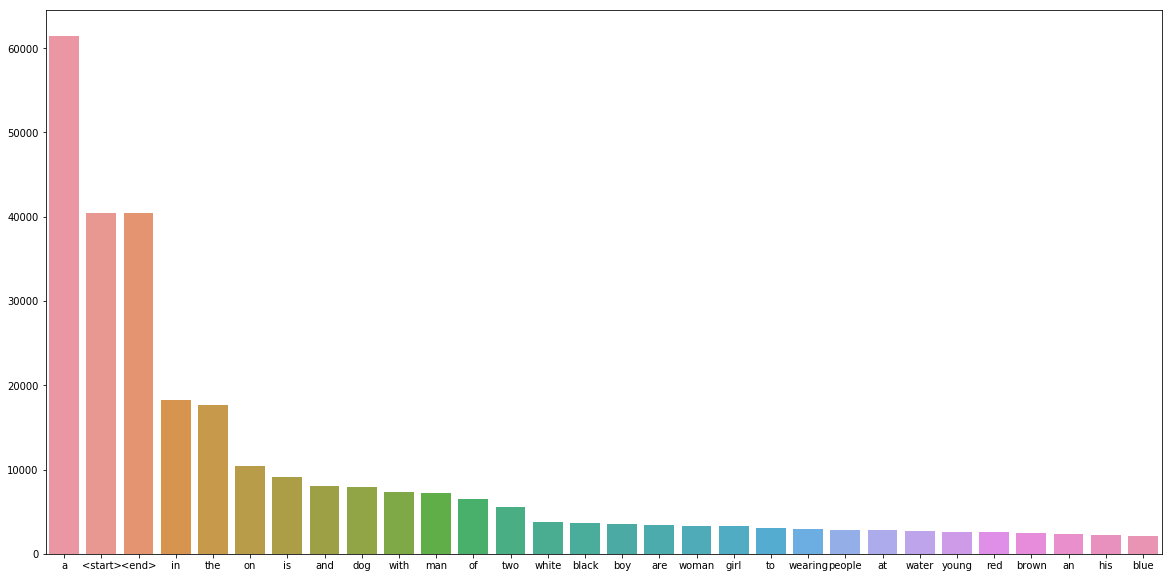

In [182]:
# plotting top 30 tokens
words,count= zip(*top_30_tokens)
plt.figure(figsize=(20,10))
sns.barplot(x=list(words),y=count)

In [183]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

cap_vector= keras.preprocessing.sequence.pad_sequences(sequences,padding='post') #your code here
print(cap_vector)

print("The shape of Caption vector is :" + str(cap_vector.shape))

[[ 3  2 44 ...  0  0  0]
 [ 3  2 20 ...  0  0  0]
 [ 3  2 39 ...  0  0  0]
 ...
 [ 3  2 43 ...  0  0  0]
 [ 3  2 83 ...  0  0  0]
 [ 3  2 83 ...  0  0  0]]
The shape of Caption vector is :(40455, 35)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [184]:
# image preprocessing
#write your code here
def preprocess(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,(299,299))
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image,image_path

In [185]:
encode = sorted(set(all_img_vector))


image_data_set = tf.data.Dataset.from_tensor_slices(encode)
image_data_set = image_data_set.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)
image_data_set

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [186]:
# SPLITTING THE DATASET
image_train,image_test, captions_train, captions_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

print("Training data for images: " + str(len(image_train)))
print("Testing data for images: " + str(len(image_test)))
print("Training data for Captions: " + str(len(captions_train)))
print("Testing data for Captions: " + str(len(captions_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [187]:
feature_dict = {}
def map_function(image_name,capt):
    image_tensor = feature_dict[image_name.decode('utf-8')]
    return image_tensor,capt

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [188]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input =  image_model.input  #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(inputs=new_input,outputs=hidden_layer) #build the final model using both input & output layer

In [189]:
image_features_extract_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [190]:
from tqdm import tqdm

In [191]:
image_data_set

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

In [192]:
for image,path in tqdm(image_data_set):
    batch_features = image_features_extract_model(image)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
    for batch_f, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature] =  batch_f.numpy()




0it [00:00, ?it/s]


1it [00:00,  1.20it/s]


2it [00:01,  1.29it/s]


3it [00:02,  1.36it/s]


4it [00:02,  1.42it/s]


5it [00:03,  1.46it/s]


6it [00:04,  1.49it/s]


7it [00:04,  1.51it/s]


8it [00:05,  1.53it/s]


9it [00:05,  1.55it/s]


10it [00:06,  1.55it/s]


11it [00:07,  1.56it/s]


12it [00:07,  1.56it/s]


13it [00:08,  1.57it/s]


14it [00:09,  1.57it/s]


15it [00:09,  1.58it/s]


16it [00:10,  1.57it/s]


17it [00:11,  1.58it/s]


18it [00:11,  1.58it/s]


19it [00:12,  1.57it/s]


20it [00:12,  1.57it/s]


21it [00:13,  1.58it/s]


22it [00:14,  1.58it/s]


23it [00:14,  1.58it/s]


24it [00:15,  1.57it/s]


25it [00:16,  1.57it/s]


26it [00:16,  1.57it/s]


27it [00:17,  1.57it/s]


28it [00:17,  1.58it/s]


29it [00:18,  1.58it/s]


30it [00:19,  1.58it/s]


31it [00:19,  1.58it/s]


32it [00:20,  1.57it/s]


33it [00:21,  1.57it/s]


34it [00:21,  1.57it/s]


35it [00:22,  1.57it/s]


36it [00:23,  1.57it/s]


37it [00:23,  1.57it/s]


38it [00:24,  1.57it/s]

In [193]:
batch_f.shape

TensorShape([64, 2048])

In [208]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
def generate_dataset(images_data, captions_data):
    
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_function, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [209]:
train_dataset=generate_dataset(image_train,captions_train)
test_dataset=generate_dataset(image_test,captions_test)

In [210]:
sample_img_batch,sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(64, 64, 2048)
(64, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [211]:
len(image_train)


32364

In [212]:
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64


embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1

train_num_steps =len(image_train)//BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps =  len(image_test) // BATCH_SIZE #len(total test images) // BATCH_SIZE

### Encoder

In [213]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense =tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        
        return features

In [214]:
encoder=Encoder(embedding_dim)

In [215]:
encoder

### Attention model

In [216]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden,1)  # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        #print('hidden',hidden_with_time_axis.shape)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer)  # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights = tf.nn.softmax(score,axis=1)  # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector,axis=1)  # reduce the shape to (batch_size, embedding_dim)
        
        
        

        return context_vector, attention_weights

### Decoder

In [217]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size,embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        #self.attention = Attention_model(self.units)
        self.dropout = tf.keras.layers.Dropout(0.5)
        

    def call(self,x,features, hidden):
        
        #print('features',features.shape)
        context_vector, attention_weights = self.attention(features,hidden) #create your context vector & attention weights from attention model
        #print('shape of inpt',x.shape)
        embed = self.dropout(self.embed(x))
        mask = self.embed.compute_mask(x)
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)
        
        #embed = self.embed(x)  # embed your input to shape: (batch_size, 1, embedding_dim)
        #print('embd',embed.shape)
        #embed = tf.concat([tf.expand_dims(context_vector,1),embed],axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        
        output,state = self.gru(embed,mask= mask) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size): 
        return tf.zeros((batch_size, self.units))

In [218]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [219]:
decoder

In [220]:
sample_cap_batch.shape

TensorShape([64, 35])

In [221]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [222]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [223]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [224]:
checkpoint_path = "hk/"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt,
                                          checkpoint_path,
                                          max_to_keep=5)

In [225]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [226]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        avg_loss = (loss/int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        return loss, avg_loss

In [227]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))

        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))

        return loss, avg_loss

In [228]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps
    return avg_test_loss

In [229]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()




  0%|          | 0/30 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.377, & test loss is 1.133
Time taken for 1 epoch 336.8021981716156 sec

Test loss has been reduced from 100.000 to 1.133





  3%|▎         | 1/30 [05:37<2:43:05, 337.44s/it]

For epoch: 2, the train loss is 1.039, & test loss is 0.991
Time taken for 1 epoch 204.21065831184387 sec

Test loss has been reduced from 1.133 to 0.991





  7%|▋         | 2/30 [09:02<2:18:54, 297.66s/it]

For epoch: 3, the train loss is 0.940, & test loss is 0.909
Time taken for 1 epoch 204.1298472881317 sec

Test loss has been reduced from 0.991 to 0.909





 10%|█         | 3/30 [12:26<2:01:23, 269.77s/it]

For epoch: 4, the train loss is 0.873, & test loss is 0.848
Time taken for 1 epoch 203.70903062820435 sec

Test loss has been reduced from 0.909 to 0.848





 13%|█▎        | 4/30 [15:51<1:48:22, 250.11s/it]

For epoch: 5, the train loss is 0.818, & test loss is 0.798
Time taken for 1 epoch 203.60258436203003 sec

Test loss has been reduced from 0.848 to 0.798





 17%|█▋        | 5/30 [19:15<1:38:28, 236.32s/it]

For epoch: 6, the train loss is 0.772, & test loss is 0.754
Time taken for 1 epoch 203.79248523712158 sec

Test loss has been reduced from 0.798 to 0.754





 20%|██        | 6/30 [22:39<1:30:39, 226.64s/it]


 23%|██▎       | 7/30 [26:01<1:24:05, 219.35s/it]

For epoch: 7, the train loss is 0.730, & test loss is 0.714
Time taken for 1 epoch 202.1798059940338 sec

Test loss has been reduced from 0.754 to 0.714





 27%|██▋       | 8/30 [29:22<1:18:25, 213.89s/it]

For epoch: 8, the train loss is 0.692, & test loss is 0.678
Time taken for 1 epoch 201.01073384284973 sec

Test loss has been reduced from 0.714 to 0.678





 30%|███       | 9/30 [32:43<1:13:30, 210.00s/it]

For epoch: 9, the train loss is 0.656, & test loss is 0.645
Time taken for 1 epoch 200.77263069152832 sec

Test loss has been reduced from 0.678 to 0.645





 33%|███▎      | 10/30 [36:04<1:09:06, 207.32s/it]

For epoch: 10, the train loss is 0.624, & test loss is 0.613
Time taken for 1 epoch 200.88955950737 sec

Test loss has been reduced from 0.645 to 0.613





 37%|███▋      | 11/30 [39:25<1:05:03, 205.45s/it]

For epoch: 11, the train loss is 0.594, & test loss is 0.585
Time taken for 1 epoch 200.9218668937683 sec

Test loss has been reduced from 0.613 to 0.585





 40%|████      | 12/30 [42:46<1:01:12, 204.01s/it]

For epoch: 12, the train loss is 0.566, & test loss is 0.556
Time taken for 1 epoch 200.49915981292725 sec

Test loss has been reduced from 0.585 to 0.556





 43%|████▎     | 13/30 [46:07<57:32, 203.08s/it]  

For epoch: 13, the train loss is 0.540, & test loss is 0.531
Time taken for 1 epoch 200.76598620414734 sec

Test loss has been reduced from 0.556 to 0.531





 47%|████▋     | 14/30 [49:27<53:56, 202.26s/it]

For epoch: 14, the train loss is 0.517, & test loss is 0.508
Time taken for 1 epoch 200.20156168937683 sec

Test loss has been reduced from 0.531 to 0.508





 50%|█████     | 15/30 [52:48<50:27, 201.81s/it]

For epoch: 15, the train loss is 0.494, & test loss is 0.488
Time taken for 1 epoch 200.65110969543457 sec

Test loss has been reduced from 0.508 to 0.488





 53%|█████▎    | 16/30 [56:08<46:59, 201.37s/it]

For epoch: 16, the train loss is 0.474, & test loss is 0.468
Time taken for 1 epoch 200.17089009284973 sec

Test loss has been reduced from 0.488 to 0.468





 57%|█████▋    | 17/30 [59:29<43:34, 201.09s/it]

For epoch: 17, the train loss is 0.455, & test loss is 0.449
Time taken for 1 epoch 200.28607296943665 sec

Test loss has been reduced from 0.468 to 0.449





 60%|██████    | 18/30 [1:02:50<40:13, 201.09s/it]

For epoch: 18, the train loss is 0.438, & test loss is 0.432
Time taken for 1 epoch 200.9274663925171 sec

Test loss has been reduced from 0.449 to 0.432





 63%|██████▎   | 19/30 [1:06:11<36:53, 201.20s/it]

For epoch: 19, the train loss is 0.422, & test loss is 0.416
Time taken for 1 epoch 201.30480575561523 sec

Test loss has been reduced from 0.432 to 0.416





 67%|██████▋   | 20/30 [1:09:32<33:31, 201.12s/it]

For epoch: 20, the train loss is 0.407, & test loss is 0.403
Time taken for 1 epoch 200.78507328033447 sec

Test loss has been reduced from 0.416 to 0.403





 70%|███████   | 21/30 [1:12:53<30:09, 201.04s/it]

For epoch: 21, the train loss is 0.394, & test loss is 0.389
Time taken for 1 epoch 200.7145893573761 sec

Test loss has been reduced from 0.403 to 0.389





 73%|███████▎  | 22/30 [1:16:14<26:47, 200.99s/it]

For epoch: 22, the train loss is 0.379, & test loss is 0.381
Time taken for 1 epoch 200.72158241271973 sec

Test loss has been reduced from 0.389 to 0.381





 77%|███████▋  | 23/30 [1:19:35<23:26, 200.92s/it]

For epoch: 23, the train loss is 0.368, & test loss is 0.365
Time taken for 1 epoch 200.60015320777893 sec

Test loss has been reduced from 0.381 to 0.365





 80%|████████  | 24/30 [1:22:56<20:06, 201.03s/it]

For epoch: 24, the train loss is 0.359, & test loss is 0.354
Time taken for 1 epoch 201.15275955200195 sec

Test loss has been reduced from 0.365 to 0.354





 83%|████████▎ | 25/30 [1:26:17<16:45, 201.03s/it]

For epoch: 25, the train loss is 0.347, & test loss is 0.344
Time taken for 1 epoch 200.86127734184265 sec

Test loss has been reduced from 0.354 to 0.344





 87%|████████▋ | 26/30 [1:29:38<13:23, 200.97s/it]

For epoch: 26, the train loss is 0.337, & test loss is 0.336
Time taken for 1 epoch 200.7002694606781 sec

Test loss has been reduced from 0.344 to 0.336





 90%|█████████ | 27/30 [1:32:59<10:02, 200.93s/it]

For epoch: 27, the train loss is 0.328, & test loss is 0.327
Time taken for 1 epoch 200.67611694335938 sec

Test loss has been reduced from 0.336 to 0.327





 93%|█████████▎| 28/30 [1:36:20<06:41, 200.87s/it]

For epoch: 28, the train loss is 0.320, & test loss is 0.317
Time taken for 1 epoch 200.56730222702026 sec

Test loss has been reduced from 0.327 to 0.317





 97%|█████████▋| 29/30 [1:39:40<03:20, 200.76s/it]

For epoch: 29, the train loss is 0.313, & test loss is 0.311
Time taken for 1 epoch 200.37858200073242 sec

Test loss has been reduced from 0.317 to 0.311





100%|██████████| 30/30 [1:43:01<00:00, 200.67s/it]

For epoch: 30, the train loss is 0.305, & test loss is 0.304
Time taken for 1 epoch 200.28244018554688 sec

Test loss has been reduced from 0.311 to 0.304


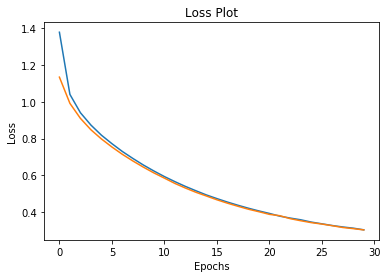

In [230]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [300]:
def evaluate(image):
    max_length= 35 #max_l
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

### Beam Search(optional)

In [301]:
def beam_evaluate(image, beam_index = 3):
    max_length= 35# max_l
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [302]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [303]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [304]:
features_shape = batch_f.shape[1]
attention_features_shape = batch_f.shape[0]

BELU score: 47.987820666906636
Real Caption: black dog is digging in the snow
Prediction Caption: a large black and white dog is digging in the snow


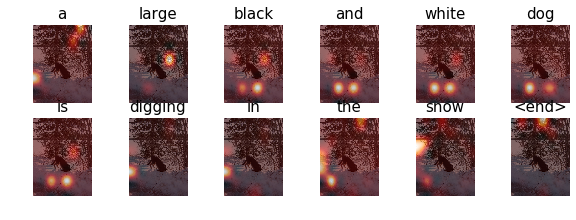

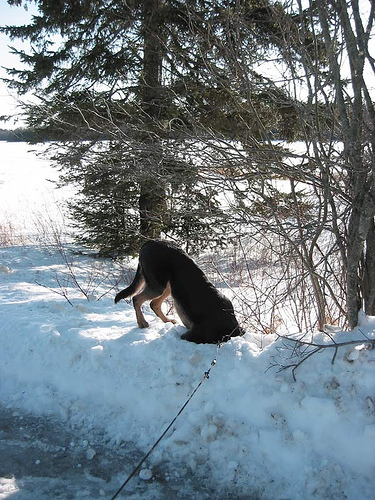

In [305]:
rid = np.random.randint(0, len(image_test))
#print(rid)
test_image = image_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'


real_caption = ' '.join([tokenizer.index_word[i] for i in captions_test[rid] if i not in [0]])
test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
real_caption = '<start> black dog is digging in the snow <end>'

result, attention_plot,pred_test = evaluate(test_image)



real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print(f"BELU score: {score*100}")

print('Real Caption:', real_caption)
print('Prediction Caption:', pred_caption)

plot_attmap(result, attention_plot, test_image)


Image.open(test_image)


In [306]:
captions=beam_evaluate(test_image)

print(captions)

a black dog in a snowball in area


In [308]:
pip install gTTs

Note: you may need to restart the kernel to use updated packages.


In [311]:
# Import the required module for text to speech conversion
from gtts import gTTS

# Language in which you want to convert
language = 'en'
  
# Passing the text and language to the engine, 
myobj = gTTS(text=pred_caption, lang=language, slow=False)
  
# Saving the converted audio in a mp3 file named
myobj.save("Predicted_text.mp3")
  
# Playing the converted file
os.system("./Predicted_text.mp3")

32256